In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import missingno as mno
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
data = pd.read_csv('DATASET_for_ANN.csv')
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# check for null values
data.isnull().values.any()

False

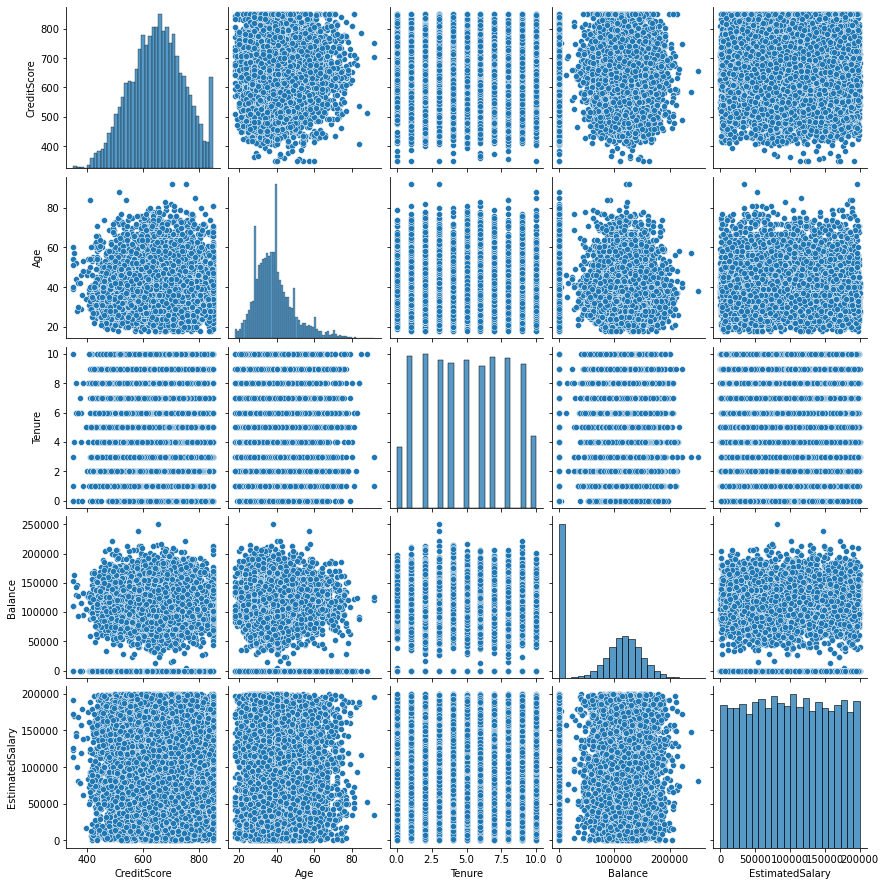

In [7]:
# Check multinomial and cuntinuous data
sns.pairplot(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

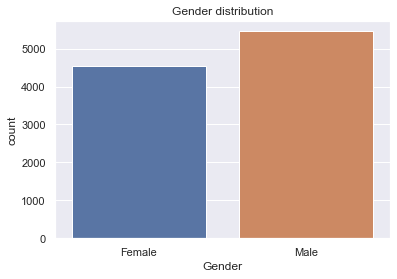

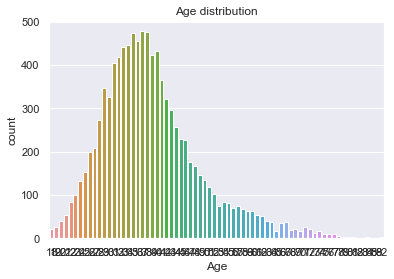

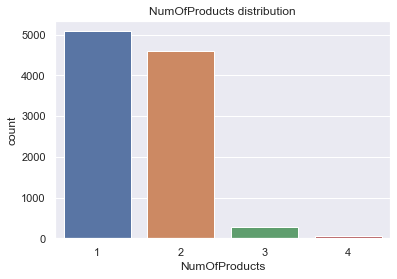

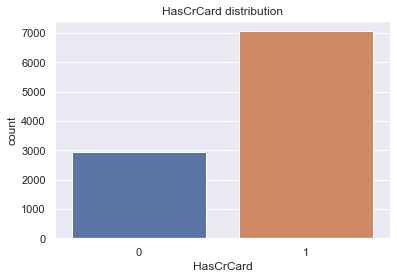

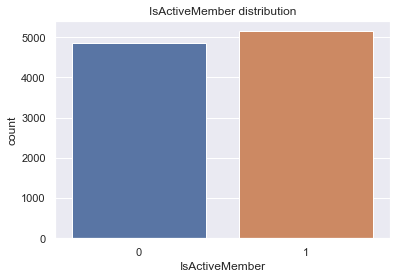

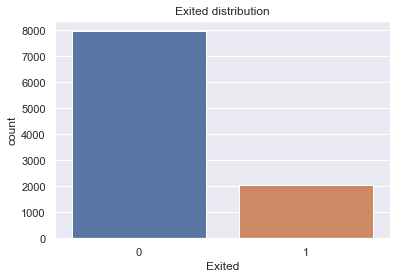

In [15]:
# check binary data
for col in ['Gender', 'Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']:
    sns.set_theme(style="darkgrid")
    plt.title(col+' distribution')
    sns.countplot(x=col, data=data)
    plt.show()

<AxesSubplot:>

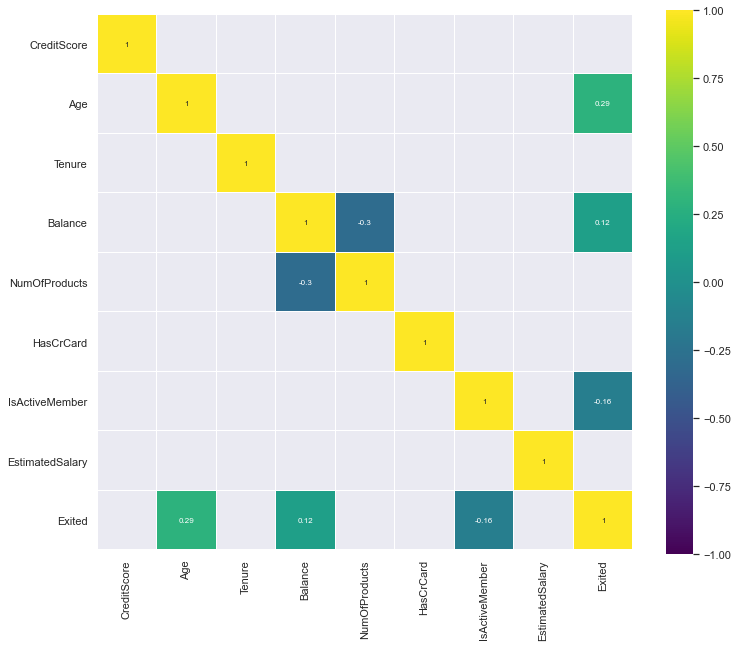

In [36]:
#Correlation heatmap
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, 
            annot=True, annot_kws={"size": 8}, square=True)

,Age,Balance,NumOfProducts,IsActiveMember,Gender,Geography
0,42,0.00,1,1,Female,France
1,41,83807.86,1,1,Female,Spain
2,42,159660.80,3,0,Female,France
3,39,0.00,2,0,Female,France
4,43,125510.82,1,1,Female,Spain


In [65]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
df = data[['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Gender', 'Geography']]

#map to integer
mapping1 = {}

for x in range(len(df['Gender'].unique())):
    mapping1[df['Gender'].unique()[x]] = x
# for x in range(len(df)): 
#     df.loc[x, 'Gender'] = mapping1[df.loc[x, 'Gender']]df['Gender']
df['Gender'] = df['Gender'].apply(lambda x: mapping1[x])
mapping2 = {}
locs = df['Geography'].unique()
for x in range(len(locs)):
    mapping2[locs[x]] = x
# for x in range(len(df)):    
#     df.loc[x, 'Gender'] = mapping1[df.loc[x, 'Gender']]

df['Geography'] = df['Geography'].apply(lambda x: mapping2[x])
df.head()

<ipython-input-65-c131185ef195>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(lambda x: mapping1[x])
<ipython-input-65-c131185ef195>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geography'] = df['Geography'].apply(lambda x: mapping2[x])


,Age,Balance,NumOfProducts,IsActiveMember,Gender,Geography
0,42,0.00,1,1,0,0
1,41,83807.86,1,1,0,1
2,42,159660.80,3,0,0,0
3,39,0.00,2,0,0,0
4,43,125510.82,1,1,0,1


In [62]:
# one hot encode
# df['Gender'] = to_categorical(df['Gender'].values)
# df['Geography'] = to_categorical(df['Geography'].values)
df.head()

,Age,Balance,NumOfProducts,IsActiveMember,Gender,Geography
0,42,0.00,1,1,1.0,1.0
1,41,83807.86,1,1,1.0,0.0
2,42,159660.80,3,0,1.0,1.0
3,39,0.00,2,0,1.0,1.0
4,43,125510.82,1,1,1.0,0.0


In [92]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df, data['Exited'], test_size=0.25, random_state=42)

In [70]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/150
750/750 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 0.7101 - val_loss: 0.4956 - val_accuracy: 0.8012
Epoch 2/150
750/750 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7947 - val_loss: 0.4930 - val_accuracy: 0.8012
Epoch 3/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4932 - val_accuracy: 0.8012
Epoch 4/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4935 - val_accuracy: 0.8012
Epoch 5/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7947 - val_loss: 0.4928 - val_accuracy: 0.8012
Epoch 6/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7947 - val_loss: 0.4934 - val_accuracy: 0.8012
Epoch 7/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7947 - val_loss: 0.4927 - val_accuracy: 0.8012

Epoch 58/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7947 - val_loss: 0.4927 - val_accuracy: 0.8012
Epoch 59/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4927 - val_accuracy: 0.8012
Epoch 60/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7947 - val_loss: 0.4935 - val_accuracy: 0.8012
Epoch 61/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4934 - val_accuracy: 0.8012
Epoch 62/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4928 - val_accuracy: 0.8012
Epoch 63/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4994 - accuracy: 0.7947 - val_loss: 0.4929 - val_accuracy: 0.8012
Epoch 64/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7947 - val_loss: 0.4927 - val_accuracy:

Epoch 115/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.7947 - val_loss: 0.4929 - val_accuracy: 0.8012
Epoch 116/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4926 - val_accuracy: 0.8012
Epoch 117/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7947 - val_loss: 0.4930 - val_accuracy: 0.8012
Epoch 118/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4995 - accuracy: 0.7947 - val_loss: 0.4925 - val_accuracy: 0.8012
Epoch 119/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4928 - val_accuracy: 0.8012
Epoch 120/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7947 - val_loss: 0.4927 - val_accuracy: 0.8012
Epoch 121/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4998 - accuracy: 0.7947 - val_loss: 0.4927 - val_ac

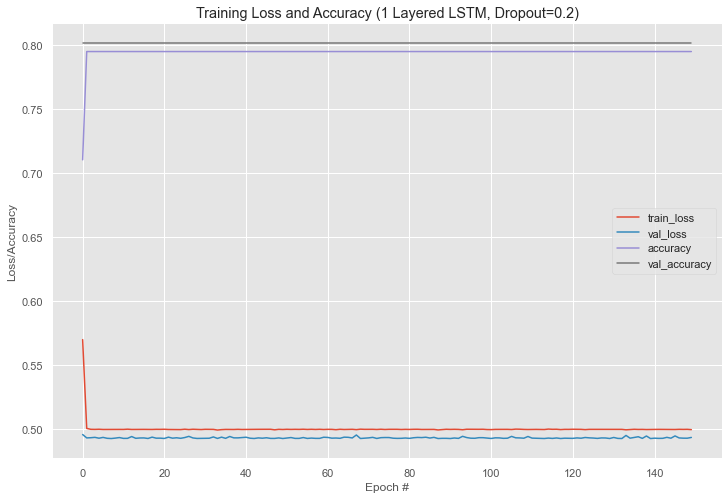

In [71]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 150)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history['accuracy'], label="accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (1 Layered LSTM, Dropout=0.2)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [78]:
from keras.optimizers import Adam
# define the keras model
model1 = Sequential()
model1.add(Dense(16, input_dim=6, activation='tanh'))
model1.add(Dense(8, activation='sigmoid'))
model1.add(Dense(8, activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
# fit the keras model on the dataset
history1 = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))


C:\Users\Omar\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4706 - accuracy: 0.7947 - val_loss: 0.4649 - val_accuracy: 0.8012
Epoch 2/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4705 - accuracy: 0.7947 - val_loss: 0.4643 - val_accuracy: 0.8012
Epoch 3/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4698 - accuracy: 0.7940 - val_loss: 0.4673 - val_accuracy: 0.8056
Epoch 4/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7971 - val_loss: 0.4638 - val_accuracy: 0.8060
Epoch 5/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4691 - accuracy: 0.7980 - val_loss: 0.4638 - val_accuracy: 0.8108
Epoch 6/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4693 - accuracy: 0.7991 - val_loss: 0.4635 - val_accuracy: 0.8112
Epoch 7/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4690 - accuracy: 0.8007 - val_loss: 0.4636 - val_accuracy: 0.8132

Epoch 58/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.8009 - val_loss: 0.4620 - val_accuracy: 0.8128
Epoch 59/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.8015 - val_loss: 0.4661 - val_accuracy: 0.8048
Epoch 60/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.8011 - val_loss: 0.4633 - val_accuracy: 0.8100
Epoch 61/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4689 - accuracy: 0.8008 - val_loss: 0.4629 - val_accuracy: 0.8116
Epoch 62/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.8001 - val_loss: 0.4618 - val_accuracy: 0.8144
Epoch 63/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4680 - accuracy: 0.8017 - val_loss: 0.4661 - val_accuracy: 0.8040
Epoch 64/150
750/750 [==============================] - 2s 2ms/step - loss: 0.4674 - accuracy: 0.8027 - val_loss: 0.4667 - val_accuracy:

Epoch 115/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.8017 - val_loss: 0.4621 - val_accuracy: 0.8120
Epoch 116/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4674 - accuracy: 0.8005 - val_loss: 0.4731 - val_accuracy: 0.7908
Epoch 117/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.8004 - val_loss: 0.4637 - val_accuracy: 0.8092
Epoch 118/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.8015 - val_loss: 0.4656 - val_accuracy: 0.8060
Epoch 119/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4677 - accuracy: 0.8019 - val_loss: 0.4620 - val_accuracy: 0.8140
Epoch 120/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4678 - accuracy: 0.7999 - val_loss: 0.4634 - val_accuracy: 0.8092
Epoch 121/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4679 - accuracy: 0.8015 - val_loss: 0.4636 - val_ac

In [83]:
from keras.optimizers import RMSprop
# define the keras model
model2 = Sequential()
model2.add(Dense(16, input_dim=6, activation='sigmoid'))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.5), metrics=['accuracy'])
# fit the keras model on the dataset
history2 = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4418 - accuracy: 0.8088 - val_loss: 0.4379 - val_accuracy: 0.8176
Epoch 2/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.8092 - val_loss: 0.4373 - val_accuracy: 0.8160
Epoch 3/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.8089 - val_loss: 0.4379 - val_accuracy: 0.8148
Epoch 4/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.8089 - val_loss: 0.4374 - val_accuracy: 0.8184
Epoch 5/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4415 - accuracy: 0.8085 - val_loss: 0.4407 - val_accuracy: 0.8160
Epoch 6/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.8085 - val_loss: 0.4384 - val_accuracy: 0.8176
Epoch 7/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8105 - val_loss: 0.4367 - val_accuracy: 0.8156

Epoch 58/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4411 - accuracy: 0.8107 - val_loss: 0.4438 - val_accuracy: 0.8148
Epoch 59/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4404 - accuracy: 0.8091 - val_loss: 0.4363 - val_accuracy: 0.8204
Epoch 60/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4410 - accuracy: 0.8099 - val_loss: 0.4380 - val_accuracy: 0.8164
Epoch 61/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8100 - val_loss: 0.4376 - val_accuracy: 0.8188
Epoch 62/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4411 - accuracy: 0.8084 - val_loss: 0.4372 - val_accuracy: 0.8200
Epoch 63/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.8103 - val_loss: 0.4380 - val_accuracy: 0.8192
Epoch 64/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4415 - accuracy: 0.8099 - val_loss: 0.4390 - val_accuracy:

Epoch 115/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4400 - accuracy: 0.8109 - val_loss: 0.4361 - val_accuracy: 0.8164
Epoch 116/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4404 - accuracy: 0.8099 - val_loss: 0.4380 - val_accuracy: 0.8184
Epoch 117/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4404 - accuracy: 0.8103 - val_loss: 0.4355 - val_accuracy: 0.8164
Epoch 118/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8099 - val_loss: 0.4370 - val_accuracy: 0.8164
Epoch 119/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.8088 - val_loss: 0.4385 - val_accuracy: 0.8176
Epoch 120/150
750/750 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8104 - val_loss: 0.4398 - val_accuracy: 0.8184
Epoch 121/150
750/750 [==============================] - 1s 1ms/step - loss: 0.4408 - accuracy: 0.8088 - val_loss: 0.4361 - val_ac

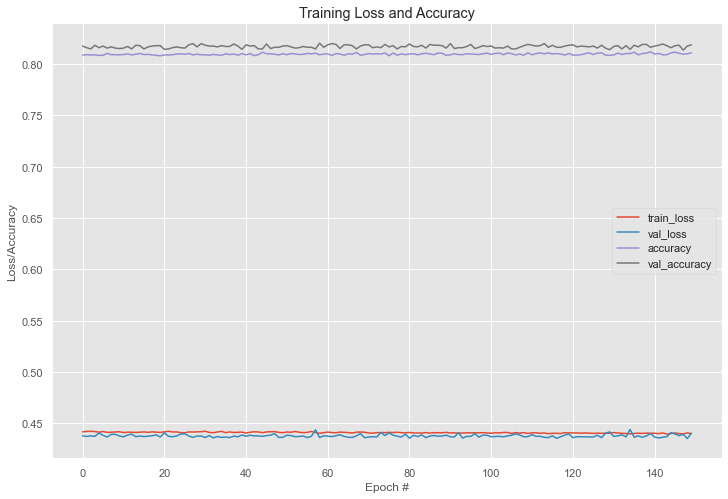

In [86]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 150)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history2.history["loss"], label="train_loss")
plt.plot(N, history2.history["val_loss"], label="val_loss")
plt.plot(N, history2.history['accuracy'], label="accuracy")
plt.plot(N, history2.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [85]:
from keras.optimizers import RMSprop
from keras import backend as K
# define the keras model
model3 = Sequential()
model3.add(Dense(16, input_dim=6, activation='sigmoid'))
model3.add(Dense(12, activation='sigmoid'))
model3.add(Dense(8, activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))
# compile the keras model
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.5), metrics=['accuracy'])

# fit the keras model on the dataset
history3 = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))
K.set_value(model.optimizer.learning_rate, 0.06)
history31 = model.fit(X_train, y_train, epochs=90, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8092 - val_loss: 0.4379 - val_accuracy: 0.8184
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.8103 - val_loss: 0.4361 - val_accuracy: 0.8156
Epoch 3/30
750/750 [==============================] - 1s 1ms/step - loss: 0.4401 - accuracy: 0.8117 - val_loss: 0.4368 - val_accuracy: 0.8148
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8123 - val_loss: 0.4379 - val_accuracy: 0.8176
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.8103 - val_loss: 0.4381 - val_accuracy: 0.8176
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.8101 - val_loss: 0.4386 - val_accuracy: 0.8172
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.8097 - val_loss: 0.4369 - val_accuracy: 0.8172
Epoch 

750/750 [==============================] - 1s 2ms/step - loss: 0.5191 - accuracy: 0.7936 - val_loss: 0.5549 - val_accuracy: 0.8012
Epoch 86/90
750/750 [==============================] - 1s 2ms/step - loss: 0.5141 - accuracy: 0.7931 - val_loss: 0.4945 - val_accuracy: 0.8012
Epoch 87/90
750/750 [==============================] - 1s 2ms/step - loss: 0.5175 - accuracy: 0.7923 - val_loss: 0.5052 - val_accuracy: 0.8012
Epoch 88/90
750/750 [==============================] - 1s 1ms/step - loss: 0.5147 - accuracy: 0.7947 - val_loss: 0.4935 - val_accuracy: 0.8012
Epoch 89/90
750/750 [==============================] - 1s 2ms/step - loss: 0.5139 - accuracy: 0.7937 - val_loss: 0.5506 - val_accuracy: 0.8012
Epoch 90/90
750/750 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 0.7936 - val_loss: 0.5094 - val_accuracy: 0.8012


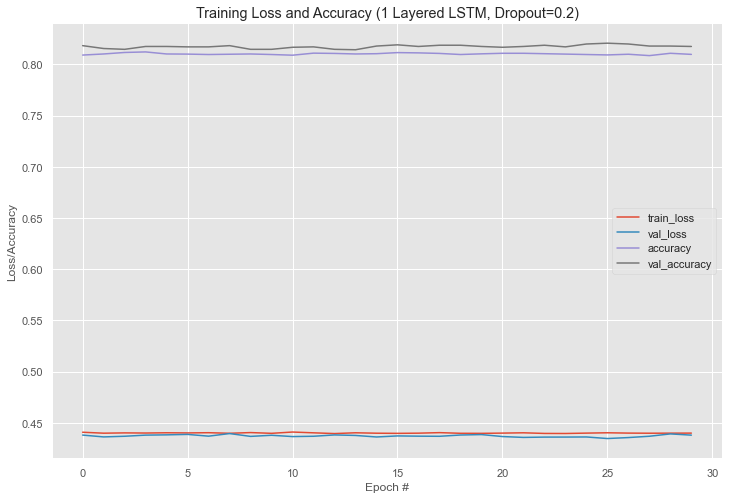

In [88]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history3.history["loss"], label="train_loss")
plt.plot(N, history3.history["val_loss"], label="val_loss")
plt.plot(N, history3.history['accuracy'], label="accuracy")
plt.plot(N, history3.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (1 Layered LSTM, Dropout=0.2)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

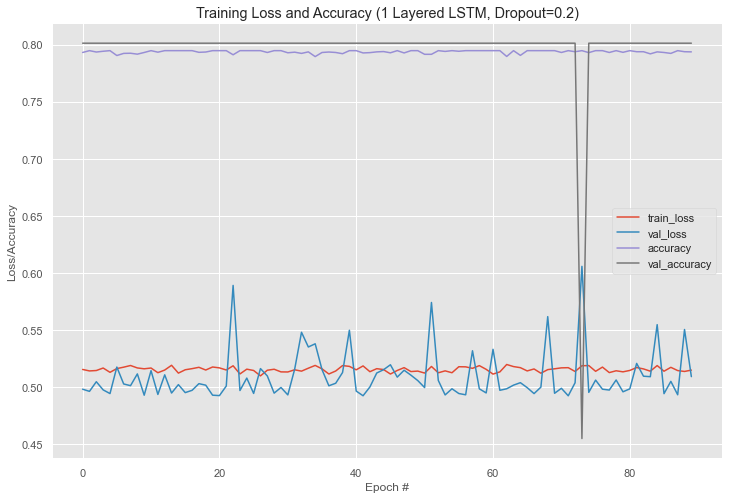

In [90]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 90)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history31.history["loss"], label="train_loss")
plt.plot(N, history31.history["val_loss"], label="val_loss")
plt.plot(N, history31.history['accuracy'], label="accuracy")
plt.plot(N, history31.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (1 Layered LSTM, Dropout=0.2)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [7]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['Geography', 'Gender']]).toarray())
df = data.drop(columns=['Exited', 'Geography', 'Gender'])
# merge with main df on key values
df = df.join(enc_df)
# df = df.drop(columns=['France', 'Spain', 'Germany', 'Male', 'Female', 'Gender', 'Geography'])
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, data['Exited'], test_size=0.25, random_state=42)

In [22]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train

array([[ 1.91661905,  1.62992801,  0.81311138, ..., -0.57735027,
        -0.91186722,  0.91186722],
       [ 0.20210899, -0.24624357, -0.91104337, ..., -0.57735027,
        -0.91186722,  0.91186722],
       [-0.75039661, -1.22102728, -0.91104337, ..., -0.57735027,
         1.09665089, -1.09665089],
       ...,
       [-0.08364269, -1.22102728,  2.53726612, ..., -0.57735027,
         1.09665089, -1.09665089],
       [ 0.3926101 ,  1.8247769 , -0.91104337, ..., -0.57735027,
        -0.91186722,  0.91186722],
       [ 1.15461458,  1.14722077, -0.91104337, ..., -0.57735027,
        -0.91186722,  0.91186722]])

In [25]:
from keras.optimizers import RMSprop
# define the keras model
model4 = Sequential()
model4.add(Dense(12, input_dim=10, activation='tanh'))
model4.add(Dense(8, activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid'))
# compile the keras model
model4.compile(loss='binary_crossentropy', optimizer=RMSprop(0.03), metrics=['accuracy'])
# fit the keras model on the dataset
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [26]:

history4 = model4.fit(X_train, y_train, epochs=35, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/35
750/750 [==============================] - 6s 3ms/step - loss: 0.4161 - accuracy: 0.8233 - val_loss: 0.3642 - val_accuracy: 0.8552
Epoch 2/35
750/750 [==============================] - 2s 2ms/step - loss: 0.3701 - accuracy: 0.8508 - val_loss: 0.3603 - val_accuracy: 0.8620
Epoch 3/35
750/750 [==============================] - 2s 2ms/step - loss: 0.3632 - accuracy: 0.8503 - val_loss: 0.3505 - val_accuracy: 0.8668
Epoch 4/35
750/750 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8539 - val_loss: 0.3417 - val_accuracy: 0.8640
Epoch 5/35
750/750 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8571 - val_loss: 0.3355 - val_accuracy: 0.8660
Epoch 6/35
750/750 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8575 - val_loss: 0.3328 - val_accuracy: 0.8668
Epoch 7/35
750/750 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8571 - val_loss: 0.3515 - val_accuracy: 0.8600
Epoch 

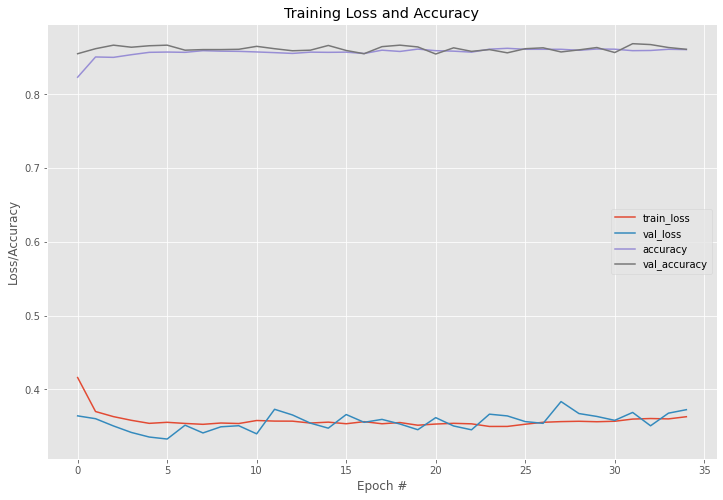

In [28]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 35)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history4.history["loss"], label="train_loss")
plt.plot(N, history4.history["val_loss"], label="val_loss")
plt.plot(N, history4.history['accuracy'], label="accuracy")
plt.plot(N, history4.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [29]:
from keras.optimizers import SGD
# define the keras model
model5 = Sequential()
model5.add(Dense(12, input_dim=10, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(6, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
# compile the keras model
model5.compile(loss='binary_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])
# fit the keras model on the dataset
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [30]:
history5 = model5.fit(X_train, y_train, epochs=35, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/35
750/750 [==============================] - 4s 3ms/step - loss: 0.5183 - accuracy: 0.7845 - val_loss: 0.4645 - val_accuracy: 0.8012
Epoch 2/35
750/750 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.8032 - val_loss: 0.4299 - val_accuracy: 0.8200
Epoch 3/35
750/750 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8220 - val_loss: 0.4132 - val_accuracy: 0.8284
Epoch 4/35
750/750 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8271 - val_loss: 0.4011 - val_accuracy: 0.8316
Epoch 5/35
750/750 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8275 - val_loss: 0.3929 - val_accuracy: 0.8312
Epoch 6/35
750/750 [==============================] - 1s 2ms/step - loss: 0.3917 - accuracy: 0.8311 - val_loss: 0.3822 - val_accuracy: 0.8400
Epoch 7/35
750/750 [==============================] - 2s 2ms/step - loss: 0.3796 - accuracy: 0.8389 - val_loss: 0.3688 - val_accuracy: 0.8476
Epoch 

# End